## Assignment 6
### Meenu Ravi
### May 14 2021

In [65]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
%load_ext tensorboard

import numpy as np
import os

np.random.seed(42)
import math
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


#### Question 1: In Keras download CIFAR10 dataset usingkeras.datasets.cifar10.load_data().The dataset is composed of 60,000 32×32-pixel color images (50,000 for training,10,000 for testing) with 10 classesBuild a DNN with 20 hidden layers of 100 neurons each (that’s too many,but it’s the point of this exercise).  Use He initialization and the ELU activationfunction.  At the output layer use a softmax output layer with 10 neurons

In [2]:
(X_train, y_train), (X_test, y_test)=keras.datasets.cifar10.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=10000, random_state=42)

In [3]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),])

In [4]:
for i in range(0,20):
     model.add(keras.layers.Dense(100, activation='elu',kernel_initializer="he_normal"))


In [5]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(lr=5e-5),
              metrics=["accuracy"])

In [7]:
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(1))
run_logdir

checkpoint = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

#### Question 2: 10 pointsUsing Nadam optimization and early stopping, train the network.Remember  to  search  for  the  right  learning  rate  each  time  you  change  themodel’s architecture or hyperparameters.

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(lr=5e-5),
              metrics=["accuracy"])

In [10]:
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [71]:
# run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(1))
# tensorboard = keras.callbacks.TensorBoard(run_logdir)

In [11]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                   callbacks=[early_stopping, checkpoint])

Epoch 1/100
1250/1250 [==============================] - 26s 16ms/step - loss: 16.4657 - accuracy: 0.1440 - val_loss: 2.2710 - val_accuracy: 0.2034
Epoch 2/100
1250/1250 [==============================] - 19s 15ms/step - loss: 2.1423 - accuracy: 0.2375 - val_loss: 2.0597 - val_accuracy: 0.2389
Epoch 3/100
1250/1250 [==============================] - 19s 15ms/step - loss: 1.9953 - accuracy: 0.2705 - val_loss: 1.9290 - val_accuracy: 0.3029
Epoch 4/100
1250/1250 [==============================] - 19s 16ms/step - loss: 1.9193 - accuracy: 0.2967 - val_loss: 1.8660 - val_accuracy: 0.3223
Epoch 5/100
1250/1250 [==============================] - 19s 15ms/step - loss: 1.8537 - accuracy: 0.3235 - val_loss: 1.8205 - val_accuracy: 0.3319
Epoch 6/100
1250/1250 [==============================] - 20s 16ms/step - loss: 1.8040 - accuracy: 0.3448 - val_loss: 1.7958 - val_accuracy: 0.3467
Epoch 7/100
1250/1250 [==============================] - 19s 15ms/step - loss: 1.7615 - accuracy: 0.3650 - val_loss: 

In [12]:
model = keras.models.load_model("my_cifar10_model.h5")
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 3ms/step - loss: 1.5416 - accuracy: 0.4561


[1.5416029691696167, 0.4560999870300293]

I searched for the best learning rate and found it to be 5e-5. The accuarcy of this model is 46%

#### Question 3: 10 pointsAdd  Batch  Normalization  and  compare  the  learning  curves:  Is  it  convergingfaster than before?  Does it produce a better model?  How does it affect trainingspeed?

In [23]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [24]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
])

In [25]:
for i in range(0,20):
    model.add(keras.layers.Dense(100,activation='elu',kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())

In [26]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(lr=5e-4),
              metrics=["accuracy"])

In [28]:
checkpoint = keras.callbacks.ModelCheckpoint("my_cifar10_BN_model.h5", save_best_only=True)

In [29]:
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [30]:
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_BN_{:03d}".format(1))

In [31]:
tensorboard = keras.callbacks.TensorBoard(run_logdir)

In [32]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                   callbacks=[early_stopping, checkpoint, tensorboard])

Epoch 1/100
1250/1250 [==============================] - 41s 25ms/step - loss: 2.1119 - accuracy: 0.2560 - val_loss: 1.7522 - val_accuracy: 0.3651
Epoch 2/100
1250/1250 [==============================] - 31s 25ms/step - loss: 1.7446 - accuracy: 0.3776 - val_loss: 1.6309 - val_accuracy: 0.4148
Epoch 3/100
1250/1250 [==============================] - 32s 25ms/step - loss: 1.6764 - accuracy: 0.4072 - val_loss: 1.5799 - val_accuracy: 0.4355 - l
Epoch 4/100
1250/1250 [==============================] - 32s 26ms/step - loss: 1.6056 - accuracy: 0.4309 - val_loss: 1.5229 - val_accuracy: 0.4569
Epoch 5/100
1250/1250 [==============================] - 32s 26ms/step - loss: 1.5519 - accuracy: 0.4527 - val_loss: 1.4816 - val_accuracy: 0.4725
Epoch 6/100
1250/1250 [==============================] - 32s 25ms/step - loss: 1.5245 - accuracy: 0.4620 - val_loss: 1.4782 - val_accuracy: 0.4818
Epoch 7/100
1250/1250 [==============================] - 32s 26ms/step - loss: 1.4728 - accuracy: 0.4795 - val_los

In [33]:
model = keras.models.load_model("my_cifar10_BN_model.h5")
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 2s 4ms/step - loss: 1.3669 - accuracy: 0.5246


[1.3669079542160034, 0.5246000289916992]

It is converging a lot faster than before. Before it took 44 epochs but now with batch normalization, it is only taking 28 epochs. The accuracy is also higher. It is 52% compared to 46% previously. It affected the training speed. Although the model converged faster, each epoch took about 25s instead of 21s, because of the extra computations required by the BN layers.

#### Question 4: 10 pointsTry replacing Batch Normalization with SELU, and make the necessary adjuste-ments to ensure the network self-normalizes (i.e., standardize the input features,use LeCun normal initialization, make sure the DNN contains only a sequenceof dense layers, etc.).

In [34]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [35]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
])

In [37]:
for i in range(0,20):
    model.add(keras.layers.Dense(100,activation='selu',kernel_initializer="lecun_normal"))
    model.add(keras.layers.BatchNormalization())


In [38]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [39]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(lr=7e-5),
              metrics=["accuracy"])

In [40]:
checkpoint = keras.callbacks.ModelCheckpoint("my_cifar10_SELU_model.h5", save_best_only=True)

In [41]:
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [42]:
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_SELU_{:03d}".format(1))

In [43]:
tensorboard = keras.callbacks.TensorBoard(run_logdir)

In [44]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                   callbacks=[early_stopping, checkpoint, tensorboard])

Epoch 1/100
1250/1250 [==============================] - 46s 27ms/step - loss: 2.1402 - accuracy: 0.2444 - val_loss: 1.7422 - val_accuracy: 0.3785
Epoch 2/100
1250/1250 [==============================] - 31s 25ms/step - loss: 1.7709 - accuracy: 0.3677 - val_loss: 1.6564 - val_accuracy: 0.4104
Epoch 3/100
1250/1250 [==============================] - 31s 25ms/step - loss: 1.7070 - accuracy: 0.3962 - val_loss: 1.6187 - val_accuracy: 0.4281
Epoch 4/100
1250/1250 [==============================] - 31s 25ms/step - loss: 1.6405 - accuracy: 0.4136 - val_loss: 1.5564 - val_accuracy: 0.4466
Epoch 5/100
1250/1250 [==============================] - 32s 26ms/step - loss: 1.5833 - accuracy: 0.4377 - val_loss: 1.5273 - val_accuracy: 0.4569
Epoch 6/100
1250/1250 [==============================] - 34s 27ms/step - loss: 1.5721 - accuracy: 0.4460 - val_loss: 1.5138 - val_accuracy: 0.4640
Epoch 7/100
1250/1250 [==============================] - 31s 25ms/step - loss: 1.5284 - accuracy: 0.4603 - val_loss: 1

In [45]:
model = keras.models.load_model("my_cifar10_SELU_model.h5")
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 2s 4ms/step - loss: 1.3910 - accuracy: 0.5103


[1.3909515142440796, 0.5102999806404114]

#### Question 5: 10 pointsTry regularizing the model with alpha dropout.  Then, without retraining yourmodel, see if you can achieve better accuracy using MC Dropout.

In [46]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [47]:
means = X_train.mean(axis=0)
stds = X_train.std(axis=0)
X_train_scaled = (X_train - means) / stds
X_valid_scaled = (X_valid - means) / stds
X_test_scaled = (X_test - means) / stds


In [48]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.AlphaDropout(rate=0.2)
])


In [49]:
for i in range(0,20):
    model.add(keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"))

In [50]:
model.add(keras.layers.AlphaDropout(rate=0.2))

In [51]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [52]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(lr=5e-4),
              metrics=["accuracy"])

In [53]:
checkpoint = keras.callbacks.ModelCheckpoint("my_cifar10_alpha_model.h5", save_best_only=True)

In [54]:
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [55]:
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_alpha_dropout_{:03d}".format(1))

In [56]:
tensorboard = keras.callbacks.TensorBoard(run_logdir)

In [57]:
history = model.fit(X_train_scaled, y_train, epochs=100,
                    validation_data=(X_valid_scaled, y_valid),
                   callbacks=[early_stopping, checkpoint, tensorboard])

Epoch 1/100
1250/1250 [==============================] - 32s 22ms/step - loss: 2.1490 - accuracy: 0.2453 - val_loss: 1.8086 - val_accuracy: 0.3708
Epoch 2/100
1250/1250 [==============================] - 25s 20ms/step - loss: 1.7709 - accuracy: 0.3660 - val_loss: 1.7570 - val_accuracy: 0.4025
Epoch 3/100
1250/1250 [==============================] - 25s 20ms/step - loss: 1.6880 - accuracy: 0.4067 - val_loss: 1.7391 - val_accuracy: 0.4150
Epoch 4/100
1250/1250 [==============================] - 25s 20ms/step - loss: 1.6293 - accuracy: 0.4250 - val_loss: 1.8497 - val_accuracy: 0.4036
Epoch 5/100
1250/1250 [==============================] - 25s 20ms/step - loss: 1.5727 - accuracy: 0.4466 - val_loss: 1.6959 - val_accuracy: 0.4408
Epoch 6/100
1250/1250 [==============================] - 26s 21ms/step - loss: 1.5490 - accuracy: 0.4541 - val_loss: 1.6779 - val_accuracy: 0.4598
Epoch 7/100
1250/1250 [==============================] - 25s 20ms/step - loss: 1.4943 - accuracy: 0.4762 - val_loss: 1

In [58]:
model = keras.models.load_model("my_cifar10_alpha_model.h5")
model.evaluate(X_valid_scaled, y_valid)

313/313 [==============================] - 1s 3ms/step - loss: 1.6135 - accuracy: 0.4612


[1.6135224103927612, 0.4611999988555908]

MC Dropout

In [59]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [60]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [61]:

def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [62]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy

0.4753

I can achieve a slightly better accuraccy

#### Question 6: 10 pointsRetrain your model using 1cycle scheduling and see if it improves training speedand model accuracy.

In [66]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [67]:
means = X_train.mean(axis=0, keepdims=True)
stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - means) / stds
X_valid_scaled = (X_valid - means) / stds
X_test_scaled = (X_test - means) / stds

In [68]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.AlphaDropout(rate=0.2)
])

In [69]:
for i in range(0,20):
    model.add(keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"))

In [70]:
model.add(keras.layers.AlphaDropout(rate=0.2))

In [71]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [72]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(lr=1e-3),
              metrics=["accuracy"])

In [73]:
K = keras.backend
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses
def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

313/313 [==============================] - 32s 34ms/step - loss: 9130.0930 - accuracy: 0.1404 1s - loss: 


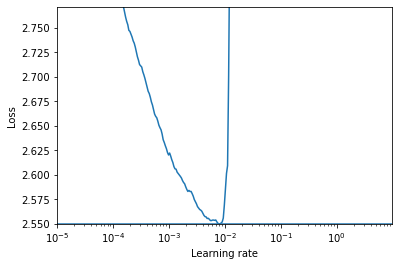

In [74]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
# plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])

In [75]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [76]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.AlphaDropout(rate=0.2)
])

In [77]:
for i in range(0,20):
    model.add(keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"))

In [78]:
model.add(keras.layers.AlphaDropout(rate=0.2))

In [79]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [80]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(lr=1e-2),
              metrics=["accuracy"])

In [81]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [82]:
n_epochs = 15
onecycle = OneCycleScheduler(len(X_train_scaled) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/15
313/313 [==============================] - 14s 34ms/step - loss: 5.4126 - accuracy: 0.1386 - val_loss: 2.3446 - val_accuracy: 0.1030
Epoch 2/15
313/313 [==============================] - 10s 32ms/step - loss: 2.3263 - accuracy: 0.0982 - val_loss: 2.3943 - val_accuracy: 0.1023
Epoch 3/15
313/313 [==============================] - 12s 37ms/step - loss: 2.3851 - accuracy: 0.1010 - val_loss: 2.8915 - val_accuracy: 0.0973
Epoch 4/15
313/313 [==============================] - 11s 36ms/step - loss: 2.5495 - accuracy: 0.1010 - val_loss: 3.1881 - val_accuracy: 0.1030
Epoch 5/15
313/313 [==============================] - 11s 36ms/step - loss: 2.7889 - accuracy: 0.1024 - val_loss: 5.4227 - val_accuracy: 0.0979
Epoch 6/15
313/313 [==============================] - 12s 38ms/step - loss: 3.1416 - accuracy: 0.0992 - val_loss: 3.7589 - val_accuracy: 0.1017
Epoch 7/15
313/313 [==============================] - 12s 38ms/step - loss: 3.4123 - accuracy: 0.0997 - val_loss: 3.7590 - val_accuracy:

In [83]:
model.evaluate(X_valid_scaled, y_valid)

313/313 [==============================] - 1s 3ms/step - loss: 2.3052 - accuracy: 0.1040


[2.305159330368042, 0.10400000214576721]

This did not imporove the accuracy rate.